In [6]:
# importing libraries
import h5py
import scipy.io as sio
import PIL.Image as Image
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as CM
%matplotlib inline

# Check the ground true using scipy

image_info 是 matlab structs，本质是一个数组，维度是（1，1），读取后是一个 NumPy structured arrays，with fields named for the struct fields。这个元素存着所有的值,把维度挤出来需要 squeeze_me=True。

这个数据有两个字段，location 表示人头的位置，number 表示人头数

> In the SciPy versions from 0.12.0, MATLAB structs come back as NumPy structured arrays, with fields named for the struct fields.

> Sometimes, it’s more convenient to load the MATLAB structs as Python objects rather than NumPy structured arrays - it can make the access syntax in Python a bit more similar to that in MATLAB. In order to do this, use the struct_as_record=False parameter setting to loadmat.


In [46]:
mat_data = sio.loadmat(
    "./dataset/shanghaitech/part_A/train_data/ground-truth/GT_IMG_6.mat")
mat_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Nov 18 20:06:15 2016',
 '__version__': '1.0',
 '__globals__': [],
 'image_info': array([[array([[(array([[   9.00940439,  644.82791619],
                        [  38.27982181,  548.65368751],
                        [ 212.50849695,  558.41049332],
                        ...,
                        [1016.63190893,  316.92954958],
                        [1016.98036628,  297.41593796],
                        [1006.64279822,  309.43771655]]), array([[554]], dtype=uint16))]],
               dtype=[('location', 'O'), ('number', 'O')])                                ]],
       dtype=object)}

In [15]:
gt_image = mat_data['image_info']
print(gt_image)
val = gt_image[0][0]
print(val)

[[array([[(array([[ 79.06193806, 310.45304695],
                 [ 25.16183816, 286.04545455],
                 [ 37.87412587, 265.1973027 ],
                 [ 10.41558442, 250.45104895],
                 [  4.82217782, 220.95854146],
                 [ 24.14485514, 206.72077922],
                 [ 21.6023976 , 176.71978022],
                 [ 47.02697303, 182.82167832],
                 [ 40.92507493, 168.58391608],
                 [ 31.77222777, 155.36313686],
                 [  9.90709291, 147.73576424],
                 [ 19.56843157, 135.02347652],
                 [ 17.02597403, 125.36213786],
                 [  5.33066933, 108.58191808],
                 [ 26.17882118, 109.09040959],
                 [ 22.61938062,  97.9035964 ],
                 [ 12.95804196,  90.27622378],
                 [  4.82217782,  94.85264735],
                 [  7.87312687,  75.52997003],
                 [ 17.02597403,  74.0044955 ],
                 [ 27.1958042 ,  77.56393606],
            

In [16]:
print(val['location'])
print(val['number'])

[[array([[ 79.06193806, 310.45304695],
         [ 25.16183816, 286.04545455],
         [ 37.87412587, 265.1973027 ],
         [ 10.41558442, 250.45104895],
         [  4.82217782, 220.95854146],
         [ 24.14485514, 206.72077922],
         [ 21.6023976 , 176.71978022],
         [ 47.02697303, 182.82167832],
         [ 40.92507493, 168.58391608],
         [ 31.77222777, 155.36313686],
         [  9.90709291, 147.73576424],
         [ 19.56843157, 135.02347652],
         [ 17.02597403, 125.36213786],
         [  5.33066933, 108.58191808],
         [ 26.17882118, 109.09040959],
         [ 22.61938062,  97.9035964 ],
         [ 12.95804196,  90.27622378],
         [  4.82217782,  94.85264735],
         [  7.87312687,  75.52997003],
         [ 17.02597403,  74.0044955 ],
         [ 27.1958042 ,  77.56393606],
         [ 29.73826174,  63.83466533],
         [ 16.51748252,  58.24125874],
         [ 10.92407592,  42.98651349],
         [ 22.11088911,  48.07142857],
         [ 36.85714286,  

In [17]:
print(val['location'][0, 0].shape)  # (1546, 2) 1546个人头

(468, 2)


In [18]:
print(gt_image[0, 0][0, 0][0])
print(gt_image[0, 0][0, 0][0].shape)
print(len(gt_image[0, 0][0, 0][0]))

[[ 79.06193806 310.45304695]
 [ 25.16183816 286.04545455]
 [ 37.87412587 265.1973027 ]
 [ 10.41558442 250.45104895]
 [  4.82217782 220.95854146]
 [ 24.14485514 206.72077922]
 [ 21.6023976  176.71978022]
 [ 47.02697303 182.82167832]
 [ 40.92507493 168.58391608]
 [ 31.77222777 155.36313686]
 [  9.90709291 147.73576424]
 [ 19.56843157 135.02347652]
 [ 17.02597403 125.36213786]
 [  5.33066933 108.58191808]
 [ 26.17882118 109.09040959]
 [ 22.61938062  97.9035964 ]
 [ 12.95804196  90.27622378]
 [  4.82217782  94.85264735]
 [  7.87312687  75.52997003]
 [ 17.02597403  74.0044955 ]
 [ 27.1958042   77.56393606]
 [ 29.73826174  63.83466533]
 [ 16.51748252  58.24125874]
 [ 10.92407592  42.98651349]
 [ 22.11088911  48.07142857]
 [ 36.85714286  55.6988012 ]
 [ 37.36563437  49.08841159]
 [ 42.95904096  39.93556444]
 [ 24.14485514  35.86763237]
 [ 16.00899101  25.18931069]
 [  4.82217782  26.71478521]
 [  6.85614386  19.5959041 ]
 [ 15.5004995    6.37512488]
 [  6.85614386   7.39210789]
 [ 19.05994006

In [19]:
gt_image[0, 0]['location'][0, 0]

array([[ 79.06193806, 310.45304695],
       [ 25.16183816, 286.04545455],
       [ 37.87412587, 265.1973027 ],
       [ 10.41558442, 250.45104895],
       [  4.82217782, 220.95854146],
       [ 24.14485514, 206.72077922],
       [ 21.6023976 , 176.71978022],
       [ 47.02697303, 182.82167832],
       [ 40.92507493, 168.58391608],
       [ 31.77222777, 155.36313686],
       [  9.90709291, 147.73576424],
       [ 19.56843157, 135.02347652],
       [ 17.02597403, 125.36213786],
       [  5.33066933, 108.58191808],
       [ 26.17882118, 109.09040959],
       [ 22.61938062,  97.9035964 ],
       [ 12.95804196,  90.27622378],
       [  4.82217782,  94.85264735],
       [  7.87312687,  75.52997003],
       [ 17.02597403,  74.0044955 ],
       [ 27.1958042 ,  77.56393606],
       [ 29.73826174,  63.83466533],
       [ 16.51748252,  58.24125874],
       [ 10.92407592,  42.98651349],
       [ 22.11088911,  48.07142857],
       [ 36.85714286,  55.6988012 ],
       [ 37.36563437,  49.08841159],
 

# View density map using h5py


[[[167 159 136]
  [189 181 158]
  [191 183 160]
  ...
  [104  98  76]
  [ 95  89  67]
  [100  94  72]]

 [[127 119  96]
  [126 118  95]
  [123 115  92]
  ...
  [ 84  78  56]
  [ 82  76  54]
  [ 97  91  69]]

 [[131 123 100]
  [124 116  93]
  [113 105  82]
  ...
  [154 147 128]
  [126 119 100]
  [150 143 124]]

 ...

 [[ 47  39  26]
  [ 54  46  33]
  [ 79  71  60]
  ...
  [ 41  34  18]
  [ 50  43  27]
  [ 58  51  35]]

 [[ 64  60  48]
  [ 68  64  52]
  [ 75  71  59]
  ...
  [ 46  43  28]
  [ 31  28  13]
  [ 32  29  14]]

 [[ 69  65  53]
  [ 67  63  51]
  [ 70  66  54]
  ...
  [ 51  48  33]
  [ 32  29  14]
  [ 31  28  13]]]


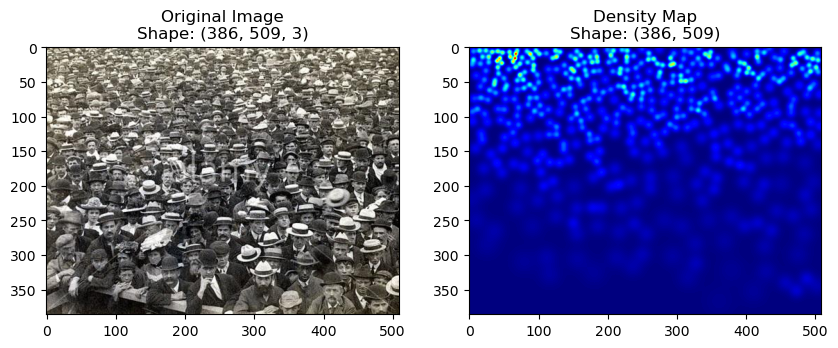

In [21]:
density_map_path = "./dataset/shanghaitech/part_A/train_data/density-maps/IMG_180.h5"
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
with h5py.File(density_map_path, "r") as hf:
  density_img = np.asarray(hf['density'])
  orginal_img = np.asarray(Image.open(density_map_path.replace(
      "density-maps", "images").replace("h5", "jpg")))
  print(orginal_img)
  axs[0].imshow(orginal_img)
  axs[0].set_title('Original Image\nShape: {}'.format(
      orginal_img.shape))  # 设置子图标题

  axs[1].imshow(density_img, cmap=CM.jet)
  axs[1].set_title('Density Map\nShape: {}'.format(
      density_img.shape))  # 设置子图标题

# Count number of people

离散密度图求和就是人头数，使用高斯核平滑后，每个像素值的会有所改变，但是求和起来仍然是人头数


In [22]:
np.sum(density_img)

464.1263

# Parallel for loops using joblib

The core idea is to write the code to be executed as a generator expression, and convert it to parallel computing

1. 使用这个库进行并行时，核心是先写一个 generator，如何在使用平行计算
2. 这个并行计算可以返回一个 generator，并且只有 generator 里面有值就可以先返回给你看，即使并行还没计算完。返回的顺序可以按照提交的顺序。

> The output can be a generator that yields the results as soon as they’re available, even if the subsequent tasks aren’t completed yet. The order of the outputs always matches the order the inputs have been submitted with:


# Check the ShanghaitechDateset

检查一下封装好的数据集，因为pytorch中，每个batchsize里的所有数据的dimension必须一样，这样才能高效计算，所以batchsize只能设置为1


In [1]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from src.custom_dataset import ShanghaitechDataset
import torch
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as CM

240 60
tensor(548.2363)


Text(0.5, 1.0, 'Density Map\nShape: torch.Size([192, 256])')

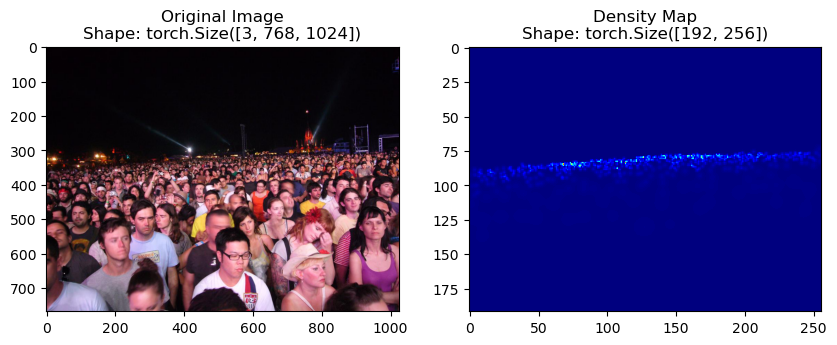

In [3]:
A_dir = os.path.join(os.getcwd(), "dataset/shanghaitech/part_A/")
A_dir

orginal_img_dir = os.path.join(A_dir, "train_data", "images")
density_map_dir = os.path.join(A_dir, "train_data", "density-maps")
csv_file = os.path.join(A_dir, "train_data", "shanghaitech.csv")

my_transforms = transforms.Compose([
    
    # toTensor就会使数据集缩放到[0,1]
    transforms.ToTensor(),
    # pytoch官方在imagenet上计算的mean和std
    # transforms.Normalize(mean=[0.485, 0.456, 0.406],
    #                                  std=[0.229, 0.224, 0.225]),
])
shanghaitechDataset = ShanghaitechDataset(
    orginal_img_dir=orginal_img_dir, density_map_dir=density_map_dir, cvs_file=csv_file, transform=my_transforms)
generator1 = torch.Generator().manual_seed(42)
train_dataset, val_dataset = torch.utils.data.random_split(
    shanghaitechDataset, [0.8, 0.2], generator1)

train_dataloader = DataLoader(
    train_dataset, batch_size=1,)
val_dataloader = DataLoader(val_dataset, 1,)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
print(len(train_dataset),len(val_dataset))
X,Y = train_dataset[0]
print(torch.sum(Y))
axs[0].imshow(torch.squeeze(X).permute(1,2,0))
axs[0].set_title('Original Image\nShape: {}'.format(
torch.squeeze(X).shape))  # 设置子图标题

axs[1].imshow(torch.squeeze(Y), cmap=CM.jet)
axs[1].set_title('Density Map\nShape: {}'.format(
torch.squeeze(Y,dim=0).shape))  # 设置子图标题

    

In [4]:
from tqdm import tqdm
def get_mean_std(loader):
  # var[X] = E[X**2] - E[X]**2
  channels_sum, channels_sqrd_sum, num_batches = 0,0,0
  for data, _ in tqdm(loader):
    # 第1个维度表示channel数量，把0，2，3维度求均值，最后只会保留channel数量，意味着把一个批次的数据集，在channel的地方求了均值
    channels_sum += torch.mean(data, dim=[0, 2, 3])
    channels_sqrd_sum += torch.mean(data**2, dim=[0, 2, 3])
    num_batches += 1

    mean = channels_sum / num_batches
    std = (channels_sqrd_sum / num_batches - mean**2) ** 0.5
    
  print(num_batches)
  return mean, std
  
mean, std = get_mean_std(train_dataloader)
print(mean,std)

100%|██████████| 240/240 [00:02<00:00, 82.79it/s]

240
tensor([0.4112, 0.3684, 0.3560]) tensor([0.2829, 0.2727, 0.2738])


# Check the model

In [9]:
from src.models import mcnn,CSRNet
from torch import nn
import torch

## VGG from pytorch

In [12]:
from torchvision.models import vgg16_bn, VGG16_BN_Weights,get_weight
vgg16_bn_model = vgg16_bn(weights=VGG16_BN_Weights.DEFAULT)
print(vgg16_bn_model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [3]:
csrnet = CSRNet()
print(csrnet)

CSRNet(
  (frontend): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 

In [4]:
print(csrnet.frontend.state_dict())

OrderedDict([('0.weight', tensor([[[[ 8.2833e-02,  2.7968e-02,  7.7096e-02],
          [ 4.9341e-02, -3.3441e-02,  1.9572e-02],
          [ 8.0300e-02,  7.7076e-02,  8.3349e-02]],

         [[-4.4296e-02, -1.7748e-01, -4.8706e-02],
          [-1.1003e-01, -2.7530e-01, -1.3474e-01],
          [-5.9982e-03, -6.1375e-02,  1.6822e-02]],

         [[ 2.7480e-02, -6.6769e-02,  4.3955e-02],
          [-2.6662e-02, -1.4995e-01, -3.3615e-02],
          [ 5.2778e-02,  1.7143e-02,  8.6744e-02]]],


        [[[-1.2628e-02,  3.0218e-02, -2.6930e-02],
          [-1.3764e-02,  1.1993e-01, -6.6263e-03],
          [-2.6019e-02, -8.3535e-03, -3.9197e-02]],

         [[-4.0557e-02,  1.3983e-02, -5.4278e-02],
          [ 1.5412e-02,  1.8198e-01,  1.7598e-02],
          [-1.7032e-02,  1.1284e-02, -2.4226e-02]],

         [[-6.5683e-02,  5.9252e-02, -5.3020e-02],
          [ 3.8278e-02,  2.7292e-01,  5.9491e-02],
          [-4.1218e-02,  3.6159e-02, -3.0478e-02]]],


        [[[ 1.4962e-06, -1.1430e-06,  1.

In [11]:
x = torch.randn((2,3,240,240))

y = csrnet(x)
print(x.shape,y.shape)

torch.Size([2, 3, 240, 240]) torch.Size([2, 1, 30, 30])


tensor(-29214.4336, device='mps:0', grad_fn=<SumBackward0>)


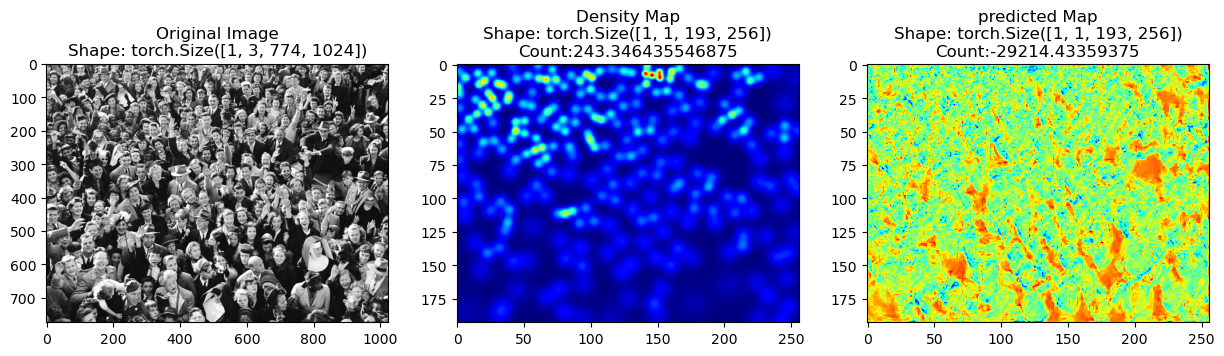

In [8]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
for X,Y in val_dataloader:
    X,Y = X.to(device),Y.to(device)
    model = mcnn(in_channels=3).to(device)
    pretrain_folder = os.path.join("", "pretrained")
    checkpoint = torch.load(os.path.join(pretrain_folder, "mcnn_checkpoint.pth"),map_location=torch.device(device))
    model.state_dict = checkpoint["state_dict"]

    pred = model(X)
    print(torch.sum(pred))
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(torch.squeeze(X,dim=0).permute(1,2,0).cpu().data.numpy())
    axs[0].set_title('Original Image\nShape: {}'.format(
    X.shape))  # 设置子图标题

    axs[1].imshow(torch.squeeze(Y).cpu().data.numpy(), cmap=CM.jet)
    axs[1].set_title('Density Map\nShape: {}\nCount:{}'.format(
    Y.shape,torch.sum(Y)))  # 设置子图标题

    axs[2].imshow(torch.squeeze(pred).cpu().data.numpy(), cmap=CM.jet)
    axs[2].set_title('predicted Map\nShape: {}\nCount:{}'.format(
    pred.shape,torch.sum(pred)))  # 设置子图标题
    break


# Check the loss

In [32]:
a = 3.7
print(f"取整：{torch.ceil(torch.tensor(a))}")

取整：4.0


In [48]:
a = torch.randint(-5,5,(3,1))
print(a)
print(torch.mean(a,dim=0,dtype=torch.float32))
print(torch.mean(a,dtype=torch.float32))
print(torch.mean(a,dtype=torch.float32).item())
print(torch.abs(a))

tensor([[-1],
        [ 1],
        [-5]])
tensor([-1.6667])
tensor(-1.6667)
-1.6666666269302368
tensor([[1],
        [1],
        [5]])


In [19]:
import torch
from torch import nn
from src.utils import MAE_MSE
loss_fn = nn.MSELoss(reduction="sum")
Y = torch.ones((1,1,2,2))
print(Y)
pred = torch.randint(low=0,high=10,size=(1,1,2,2),generator=torch.manual_seed(21)
)
print(pred)
print(f"abs:{abs(pred - Y)}")
print(f"square:{(pred - Y) ** 2}")

loss = loss_fn(pred,Y)
mae,mse = MAE_MSE(pred,Y)
print(f"loss:{loss}")
print(f"mae:{mae}")
print(f"mse:{mse}")



tensor([[[[1., 1.],
          [1., 1.]]]])
tensor([[[[3, 3],
          [6, 8]]]])
abs:tensor([[[[2., 2.],
          [5., 7.]]]])
square:tensor([[[[ 4.,  4.],
          [25., 49.]]]])
loss:82.0
mae:16.0
mse:16.0


TypeError: sqrt(): argument 'input' (position 1) must be Tensor, not int

In [1]:
import logging

In [2]:
logging.warning('Watch out!')  # will print a message to the console
logging.info('I told you so')  # will not print anything

In [3]:
logging.basicConfig(filename='example.log', encoding='utf-8', level=logging.DEBUG)
logging.debug('This message should go to the log file')
logging.info('So should this')
logging.warning('And this, too')
logging.error('And non-ASCII stuff, too, like Øresund and Malmö')

ERROR:root:And non-ASCII stuff, too, like Øresund and Malmö
